<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/PraktikumMandiri10/Pertemuan10_TugasMandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas 1 Mandiri

In [59]:
import pandas as pd

# Data sesuai tabel di slide
data = {
    'Temperature': [10, 25, 15, 20, 18, 20, 22, 24],
    'WindSpeed':  [0,  0,  5,  3,  7, 10,  5,  6],
    'Label': ['Dingin','Panas','Dingin','Panas',
              'Dingin','Dingin','Panas','Panas']
}

df = pd.DataFrame(data)
print(df)


   Temperature  WindSpeed   Label
0           10          0  Dingin
1           25          0   Panas
2           15          5  Dingin
3           20          3   Panas
4           18          7  Dingin
5           20         10  Dingin
6           22          5   Panas
7           24          6   Panas


In [60]:
# Pemisahan fitur (X) dan label (y)
X = df[['Temperature', 'WindSpeed']]   # fitur
y = df['Label']                        # label (Panas/Dingin)


In [61]:
# Pelatihan Model KNN dan Prediksi
from sklearn.neighbors import KNeighborsClassifier

# pilih k (contoh: k=3)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# titik uji Merry
X_test = [[16, 3]]
pred = knn.predict(X_test)
print("Persepsi Merry untuk (16°C, 3 km/jam):", pred[0])


Persepsi Merry untuk (16°C, 3 km/jam): Dingin


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [62]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
k_values = [1, 3, 5, 7]
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    correct = 0
    total = 0

    for train_idx, test_idx in loo.split(X):
        knn.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred = knn.predict(X.iloc[test_idx])
        if y_pred[0] == y.iloc[test_idx].values[0]:
            correct += 1
        total += 1

    acc = correct / total
    results[k] = acc
    print(f"k = {k}, akurasi = {acc:.2f}")

print("\nHasil akurasi per k:", results)
best_k = max(results, key=results.get)
print("k terbaik =", best_k, "dengan akurasi =", results[best_k])


k = 1, akurasi = 1.00
k = 3, akurasi = 0.75
k = 5, akurasi = 0.75
k = 7, akurasi = 0.00

Hasil akurasi per k: {1: 1.0, 3: 0.75, 5: 0.75, 7: 0.0}
k terbaik = 1 dengan akurasi = 1.0


Tugas 2 Mandiri
Studi Kasus: Prediksi Kelulusan Matakuliah AI menggunakan model
machine learning didapat hasil sebagai berikut:

In [63]:
# Import library
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [64]:
# Menambah dan membaca data
data = {
    'NIM':['TI001','TI002','TI003','TI004','TI005','TI006','TI007','TI008','TI009','TI010'],
    'Sebenarnya':['Lulus','Lulus','Lulus','Lulus','Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus'],
    'Prediksi':['Lulus','Lulus','Lulus','Tidak Lulus','Tidak Lulus','Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus',]
}

df = pd.DataFrame(data)
df.head()

,NIM,Sebenarnya,Prediksi
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus


In [65]:
# Pemeriksaan Nilai Unik pada Kolom Kategorikal
print(df['Sebenarnya'].unique())
print(df['Prediksi'].unique())

['Lulus' 'Tidak Lulus']
['Lulus' 'Tidak Lulus']


/tmp/ipython-input-2140716819.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  actual = df['Sebenarnya'].replace({'Lulus':1, 'Tidak Lulus':0})
/tmp/ipython-input-2140716819.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted = df['Prediksi'].replace({'Lulus':1, 'Tidak Lulus':0})


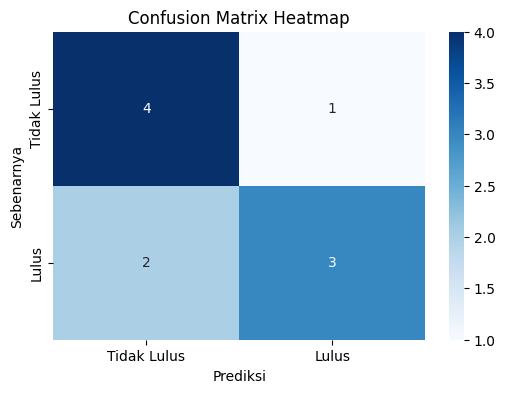

In [66]:
# Hitung Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ubah label ke bentuk biner agar mudah dihitung
actual = df['Sebenarnya'].replace({'Lulus':1, 'Tidak Lulus':0})
predicted = df['Prediksi'].replace({'Lulus':1, 'Tidak Lulus':0})

cm = confusion_matrix(actual, predicted)


# Visualisasi Confusion Matrix sebagai Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Lulus', 'Lulus'],
            yticklabels=['Tidak Lulus', 'Lulus'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [67]:
# Menghitung Akurasi
akurasi = accuracy_score(actual, predicted)
print(f"Akurasi: {akurasi}")

Akurasi: 0.7


In [68]:
# Menghitung Precission
precision = precision_score(actual, predicted)
print(f"precision: {precision}")

precision: 0.75


In [69]:
# Menghitung Recall
recall = recall_score(actual, predicted)
print(f"recall: {recall}")

recall: 0.6


Tugas 3 Mandiri Studi Kasus: Gunakan KNN untuk prediksi Cuaca

In [70]:
# Import library
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [71]:
# Input data

data = {
    'Temperature': [14.0, 39.0, 30.0, 38.0, 27.0, 32.0, -2.0, 3.0, 3.0, 28.0],
    'Humidity': [73, 96, 64, 83, 74, 55, 97, 85, 83, 74],
    'Wind Speed': [9.5, 8.5, 7.0, 1.5, 17.0, 3.5, 8.0, 6.0, 6.0, 8.5],
    'Precipitation (%)': [82.0, 71.0, 16.0, 82.0, 66.0, 26.0, 86.0, 96.0, 66.0, 107.0],
    'Cloud Cover': ['partly cloudy', 'partly cloudy', 'clear', 'clear', 'overcast', 'overcast', 'overcast', 'partly cloudy', 'overcast', 'clear'],
    'Atmospheric Pressure': [1010.82, 1011.43, 1018.72, 1026.25, 990.67, 1010.03, 990.87, 984.46, 999.44, 1012.13],
    'UV Index': [2, 7, 5, 7, 1, 2, 1, 1, 0, 8],
    'Season': ['Winter', 'Spring', 'Spring', 'Spring', 'Winter', 'Summer', 'Winter', 'Winter', 'Winter', 'Winter'],
    'Visibility (km)': [3.5, 10.0, 5.5, 1.0, 2.5, 5.0, 4.0, 3.5, 1.0, 7.5],
    'Location': ['inland', 'inland', 'mountain', 'coastal', 'mountain', 'inland', 'inland', 'inland', 'mountain', 'coastal'],
    'Weather Type': ['Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Sunny']
}
df_train = pd.DataFrame(data)

In [72]:
# Encoding Fitur Kategorikal dan Target
from sklearn.preprocessing import LabelEncoder

le_cloud = LabelEncoder()
le_season = LabelEncoder()
le_location = LabelEncoder()
le_weather = LabelEncoder()
df_train['Cloud Cover'] = le_cloud.fit_transform(df_train['Cloud Cover'])
df_train['Season'] = le_season.fit_transform(df_train['Season'])
df_train['Location'] = le_location.fit_transform(df_train['Location'])
df_train['Weather Type'] = le_weather.fit_transform(df_train['Weather Type'])  # Target labe

In [73]:
# PREPROCESSING DATA (Scaling & Encoding)
# Pisahkan Fitur (X) dan Target (y)
X_train = df_train.drop(columns=['Weather Type'], axis=1)
y_train = df_train['Weather Type']

In [74]:
# 5.	Cross-validation untuk mencari K terbaik
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

best_score = 0
best_k = 0
for k in range(1, 5):  # Uji beberapa nilai k dari 1 hingga 4 (sebelumnya 1 hingga 5)
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=2).mean()  # Cross-validation
    print(f"k={k}, akurasi={score:.2f}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nK terbaik: {best_k} dengan akurasi: {best_score:.2f}")

k=1, akurasi=0.88
k=2, akurasi=0.88
k=3, akurasi=0.75
k=4, akurasi=0.50

K terbaik: 1 dengan akurasi: 0.88


In [75]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
# Contoh prediksi (isi sesuai format X)
# knn_final.predict([ [input-features] ])

KNeighborsClassifier(n_neighbors=1)

In [76]:
new_data = [
    20.0,                # Temperature
    80,                  # Humidity
    5.0,                 # Wind Speed
    70,                  # Precipitation
    le_cloud.transform(['overcast'])[0],      # Cloud Cover
    1005.0,              # Atmospheric Pressure
    2,                   # UV Index
    le_season.transform(['Winter'])[0],       # Season
    2.0,                 # Visibility
    le_location.transform(['mountain'])[0]    # Location
]


In [77]:
# Convert new_data to a DataFrame with appropriate column names to match X_train
new_data_df = pd.DataFrame([new_data], columns=X_train.columns)

prediksi = knn_final.predict(new_data_df)
hasil = le_weather.inverse_transform(prediksi)
print("Prediksi tipe cuaca:", hasil[0])

Prediksi tipe cuaca: Rainy
